# XRD Data Analysis

## Overview

This Jupyter Notebook is dedicated to the analysis of X-ray Diffraction (XRD) data in the field of material characterization. The data utilized in this analysis originates from research conducted at IITM.

### Notebook Information

- **Creator:** Aman Kumar Shah
- **Date Created:** 30/12/2023
- **GitHub Repository:** [Analytical_Insights_with_Python-AIP](https://github.com/Amanshah383/Analytical_Insights_with_Python-AIP-)

### Data Information

- **Data Source:** XRD_Sample_Data.txt
- **Format:** Text file (.txt)

## Analysis Steps

1. [Data Loading and Exploration](#1)
2. [Plotting the Data as Line Graph](#2)
3. [Peak Detection and Plotting with the Peaks](#3)
4. [Smoothing the Curve, Filtering the Noise](#4)

### Notes

- This notebook is designed for educational and analytical purposes.


## Packages

Before diving into the analysis, let's import the essential Python libraries that power this notebook:

- **NumPy (`np`):**
  - Fundamental package for scientific computing with support for large, multi-dimensional arrays and matrices, along with mathematical functions.

- **Pandas (`pd`):**
  - Powerful data manipulation and analysis library, providing data structures for efficiently storing and manipulating large datasets.

- **Matplotlib (`plt`):**
  - Comprehensive plotting library that produces static, animated, and interactive visualizations in Python.

- **Peakdetect:**
  - Library for detecting peaks in data, particularly useful for identifying significant points in the XRD data.

- **SciPy:**
  - Library for scientific and technical computing, including modules for optimization, signal processing, and statistical functions.

- **Matplotlib Ticker (`MultipleLocator`):**
  - Module from Matplotlib used for controlling the major and minor tick locators on a plot.

- **`%matplotlib inline`:**
  - A Jupyter Notebook magic command that enables the inline plotting of Matplotlib figures directly within the notebook cells, allowing for real-time visualization.


These libraries collectively empower the analysis and visualization of XRD data in this notebook.


In [14]:
# Importing the required libraries

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from peakdetect import peakdetect
from scipy.signal import savgol_filter
from matplotlib.ticker import MultipleLocator
from A3_XRD_utils import *

%matplotlib inline

<a name='1'></a>
### 1 - Data Loading and Exploration

In this section, we'll explore the loaded XRD data using three key operations:

- **`df.info()`:**
  - Provides a concise summary of the DataFrame, including data types, non-null values, and memory usage, offering a quick overview of the dataset.

- **`df.head()`:**
  - Displays the first few rows of the DataFrame, offering a glimpse into the structure and content of the loaded XRD data.

- **`df.describe()`:**
  - Generates descriptive statistics of the numerical columns in the DataFrame, providing insights into the distribution and central tendency of the XRD data.


#### Loading the Data into a DataFrame
We start by loading the XRD data from the text file (`A2_XRD_Sample_Data.txt`) into a Pandas DataFrame (`df`). The `read_csv` function is used to read the data, specifying the delimiter and column names.



In [15]:
# Load the XRD data from the text file into a DataFrame
df = pd.read_csv("A2_XRD_Sample_Data.txt", delimiter='\t', names=['2 theta', 'Intensity(a.u)'])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7501 entries, 0 to 7500
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   2 theta         7501 non-null   float64
 1   Intensity(a.u)  7501 non-null   float64
dtypes: float64(2)
memory usage: 117.3 KB


In [16]:
df.head()

,2 theta,Intensity(a.u)
0,5.00,72059.2
1,5.01,72928.3
2,5.02,72520.0
3,5.03,72881.7
4,5.04,72706.7


In [17]:
df.describe()

,2 theta,Intensity(a.u)
count,7501.000000,7501.000000
mean,42.500000,95138.425743
std,21.654965,14428.453186
min,5.000000,63309.200000
25%,23.750000,88316.700000
50%,42.500000,102428.000000
75%,61.250000,103705.000000
max,80.000000,138740.000000


<a name='2'></a>
### 2 - Plotting the Data as Line Graph

In this section, we'll visualize the XRD data by creating a line graph using Matplotlib. This graph provides a clear representation of the relationship between the XRD angles (`2 theta`) and the corresponding intensity values (`Intensity(a.u)`).


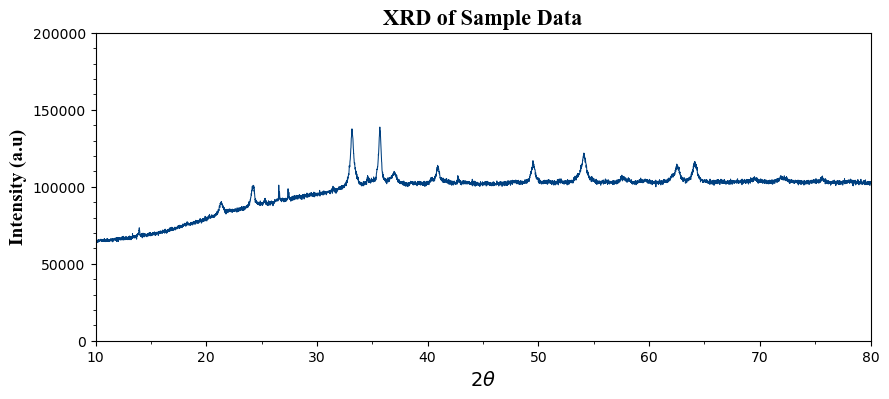

In [18]:
# Adjust the figsize to your desired dimensions
fig, ax = plt.subplots(figsize=(10, 4))

ax.plot(df["2 theta"], df["Intensity(a.u)"], linestyle='-', color="#004080", linewidth = 0.75)
ax.set_xlim(10, 80)
ax.set_ylim(0, 200000)

# Set title and axis labels with custom font
ax.set_title("XRD of Sample Data", fontdict={'family': 'Times New Roman', 'size': 16, 'weight': 'bold'})
ax.set_xlabel(r'$2 \theta$', fontdict={'family': 'Times New Roman', 'size': 14, 'weight': 'bold'})
ax.set_ylabel('Intensity (a.u)', fontdict={'family': 'Times New Roman', 'size': 14, 'weight': 'bold'})

# Adjust major and minor ticks on the x-axis
ax.xaxis.set_major_locator(MultipleLocator(10))  
ax.xaxis.set_minor_locator(MultipleLocator(5)) 

# Adjust major and minor ticks on the y-axis
ax.yaxis.set_major_locator(MultipleLocator(50000))  
ax.yaxis.set_minor_locator(MultipleLocator(10000))  

plt.show()

<a name='3'></a>
### 3 - Peak Detection and Plotting with the Peaks

In this section, we'll explore the detection of peaks in the XRD data using the `peakdetect` library and visualize these peaks on the line graph.

#### Peak Detection using `peakdetect`

To identify significant points in the XRD data, we leverage the `peakdetect` library. This library aids in the automatic detection of local maxima and minima within a dataset.

The key parameters used for peak detection are:

- **`lookahead` (default: 20):**
  - Determines the number of data points that are considered ahead to decide if a point is a peak. Adjusting this parameter impacts the sensitivity of peak detection.

- **`delta` (default: 0):**
  - Defines the minimum difference between a peak and its surrounding points for it to be considered a valid peak. Modifying this parameter influences the threshold for peak detection.


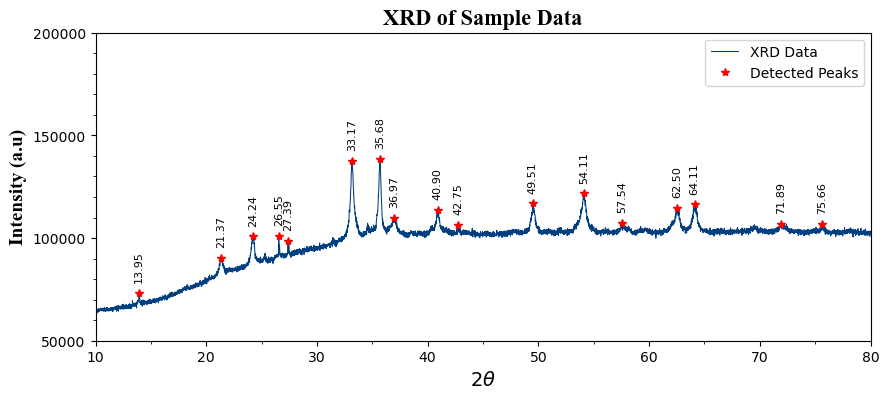

,Index,2 Theta,Intensity
0,895.0,13.95,73342.5
1,1637.0,21.37,90410.8
2,1924.0,24.24,100899.0
3,2155.0,26.55,101045.0
4,2239.0,27.39,98670.8
5,2817.0,33.17,137492.0
6,3068.0,35.68,138740.0
7,3197.0,36.97,109958.0
8,3590.0,40.90,113896.0
9,3775.0,42.75,106534.0


In [19]:
data = df["Intensity(a.u)"].values

lookahead = 50 # Adjust this as per your data to correctly detect your peaks
delta = 5000 # Adjust this as per your data to correctly detect your peaks

# Detect peaks using peakdetect
peaks = peakdetect(data, lookahead = lookahead, delta = delta)
Detected_Peaks = np.array(peaks[0])  # Use the first array for upper peaks

# Create a new DataFrame for detected peaks
peaks_df = pd.DataFrame(Detected_Peaks, columns=["Index", "Intensity"])

# Add "2 Theta" column to peaks_df
peaks_df["2 Theta"] = df.iloc[peaks_df["Index"].astype(int), 0].values

# Rearrange the columns
peaks_df = peaks_df[['Index', '2 Theta', 'Intensity']]

# Plot the original XRD data
fig, ax = plt.subplots(figsize=(10, 4))

# Set title and axis labels with custom font (Times New Roman)
font_properties_title = {'family': 'Times New Roman', 'size': 16, 'weight': 'bold'}
font_properties_axis = {'family': 'Times New Roman', 'size': 14, 'weight': 'bold'}

ax.plot(df["2 theta"], data, label='XRD Data', linestyle='-', color="#004080", linewidth=0.75)
ax.set_xlim(10, 80)
ax.set_ylim(50000, 200000)

ax.set_title("XRD of Sample Data", fontdict=font_properties_title)
ax.set_xlabel(r'$2 \theta$', fontdict=font_properties_axis)
ax.set_ylabel('Intensity (a.u)', fontdict=font_properties_axis)

ax.xaxis.set_major_locator(MultipleLocator(10))
ax.xaxis.set_minor_locator(MultipleLocator(5))
ax.yaxis.set_major_locator(MultipleLocator(50000))
ax.yaxis.set_minor_locator(MultipleLocator(10000))

# Plot detected peaks in red stars
ax.plot(df.iloc[Detected_Peaks[:, 0], 0], Detected_Peaks[:, 1], 'r*', label='Detected Peaks')

# Add data labels for detected peaks (2 Theta values)
for i, txt in enumerate(peaks_df["2 Theta"]):
    ax.text(peaks_df.iloc[i]["2 Theta"], peaks_df.iloc[i]["Intensity"] + 5000,
            f'{txt:.2f}', ha='center', va='bottom', rotation=90, fontsize=8)

ax.legend()
plt.show()

# Print the coordinates of detected peaks
peaks_df


<a name='4'></a>

### 4 - Smoothing the Curve, Filtering the Noise

In this section, we'll explore the application of the Savitzky-Golay filter to smooth the XRD data, effectively reducing noise and enhancing patterns.

#### Savitzky-Golay Filter

The Savitzky-Golay filter is a method for smoothing noisy data. Unlike traditional moving-average methods, this filter preserves the shape of the underlying signal while effectively reducing high-frequency noise. It works by fitting a polynomial within a sliding window and using the polynomial coefficients to estimate the smoothed values.

**Key Parameters:**

- `window_size`:
  - Determines the size of the window over which the polynomial is fitted. A larger window captures more significant trends but may oversmooth the data.

- `poly_order`:
  - Specifies the order of the polynomial to be fitted within the window. Higher orders allow the filter to capture more complex patterns but may lead to overfitting.


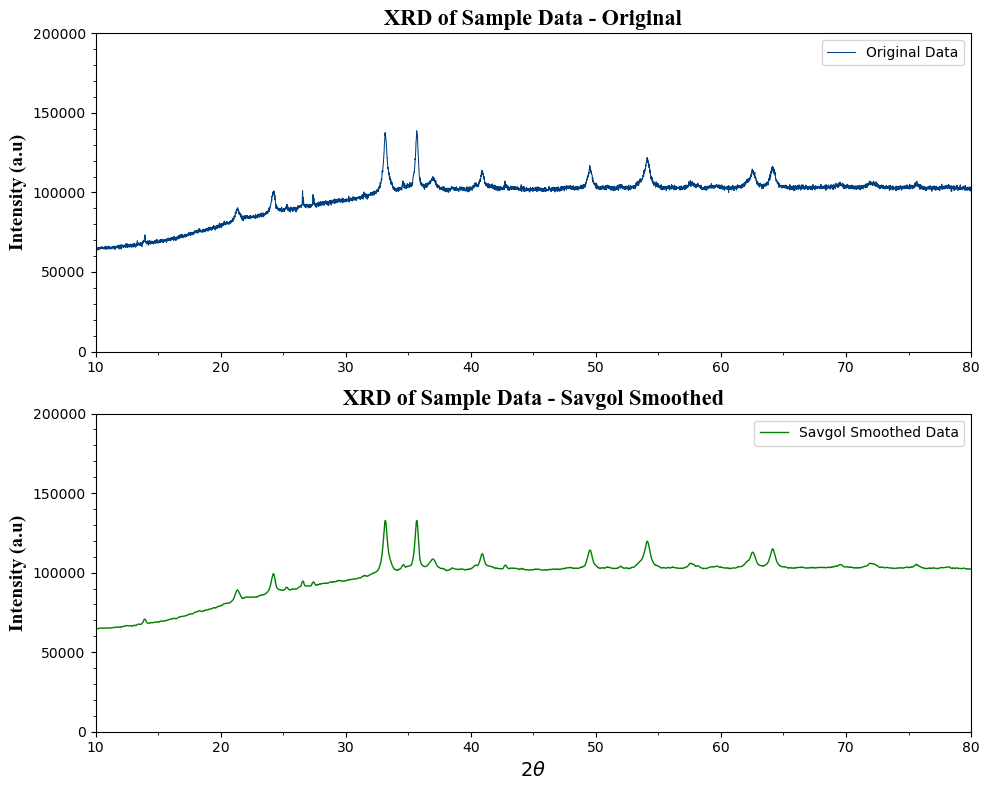

,2 Theta,Savgol_Filtered_Intensity
0,5.00,72633.928571
1,5.01,72575.730301
2,5.02,72517.532030
3,5.03,72459.333759
4,5.04,72401.135489


In [21]:
# Apply Savitzky-Golay filter to the Intensity column
window_size = 20  # Adjust this based on your data
poly_order = 1   # Adjust this based on your data
df['Savgol_Filtered_Intensity'] = savgol_filter(df["Intensity(a.u)"], window_size, poly_order)

# Create a new DataFrame for the smoothened data
smooth_data_df = pd.DataFrame({'2 Theta': df["2 theta"], 'Savgol_Filtered_Intensity': df['Savgol_Filtered_Intensity']})

# Adjust the figsize to your desired dimensions
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

# Plot original data
ax1.plot(df["2 theta"], df["Intensity(a.u)"], linestyle='-', color="#004080", linewidth=0.75, label='Original Data')
ax1.set_xlim(10, 80)
ax1.set_ylim(0, 200000)
ax1.set_title("XRD of Sample Data - Original", fontdict={'family': 'Times New Roman', 'size': 16, 'weight': 'bold'})
ax1.set_ylabel('Intensity (a.u)', fontdict={'family': 'Times New Roman', 'size': 14, 'weight': 'bold'})
ax1.xaxis.set_major_locator(MultipleLocator(10))
ax1.xaxis.set_minor_locator(MultipleLocator(5))
ax1.yaxis.set_major_locator(MultipleLocator(50000))
ax1.yaxis.set_minor_locator(MultipleLocator(10000))
ax1.legend()

# Plot smoothed data using Savitzky-Golay filter
ax2.plot(df['2 theta'], df['Savgol_Filtered_Intensity'], linestyle='-', color="g", linewidth=1, label='Savgol Smoothed Data')
ax2.set_xlabel(r'$2 \theta$', fontdict={'family': 'Times New Roman', 'size': 14, 'weight': 'bold'})
ax2.set_ylabel('Intensity (a.u)', fontdict={'family': 'Times New Roman', 'size': 14, 'weight': 'bold'})
ax2.set_xlim(10, 80)
ax2.set_ylim(0, 200000)
ax2.xaxis.set_major_locator(MultipleLocator(10))
ax2.xaxis.set_minor_locator(MultipleLocator(5))
ax2.yaxis.set_major_locator(MultipleLocator(50000))
ax2.yaxis.set_minor_locator(MultipleLocator(10000))
ax2.set_title("XRD of Sample Data - Savgol Smoothed", fontdict={'family': 'Times New Roman', 'size': 16, 'weight': 'bold'})
ax2.legend()

plt.tight_layout()
plt.show()

# Print or do further analysis with the new DataFrame
smooth_data_df.head()

### Some more features will be updated soon ...